In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../input/mushroom-classification/mushrooms.csv")

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.shape

(8124, 23)

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
#unique for object data type
for col in data.columns:
    print(col, " : ", data[col].unique())

class  :  ['p' 'e']
cap-shape  :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :  ['s' 'y' 'f' 'g']
cap-color  :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :  ['t' 'f']
odor  :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :  ['f' 'a']
gill-spacing  :  ['c' 'w']
gill-size  :  ['n' 'b']
gill-color  :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :  ['e' 't']
stalk-root  :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :  ['s' 'f' 'y' 'k']
stalk-color-above-ring  :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :  ['p']
veil-color  :  ['w' 'n' 'o' 'y']
ring-number  :  ['o' 't' 'n']
ring-type  :  ['p' 'e' 'l' 'f' 'n']
spore-print-color  :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

# Preprocessing the data, convert string data binary form or give some label.

In [9]:
def label_encoding(c):
    from sklearn import preprocessing
    label_end = preprocessing.LabelEncoder()
    data[c] = label_end.fit_transform(data[c])
    data[c].unique()
for col in data.columns:
    label_encoding(col)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [10]:
data['veil-type'].unique().sum()

0

In [11]:
data = data.drop('veil-type',axis=1)

# Feature Selection

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1), # drop the target
    data['class'], # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((5686, 21), (2438, 21))

In [13]:
# to determine the chi2 value
from sklearn.feature_selection import chi2

# to select the features
from sklearn.feature_selection import SelectKBest

In [14]:
# calculate the chi2 p_value between each of the variables
# and the target

# chi2 returns 2 arrays, one contains the F-Scores which are then
# evaluated against the chi2 distribution to obtain the pvalue.
# The pvalues are in the second array

f_score = chi2(X_train.fillna(0), y_train)

# the 2 arrays of values
f_score

(array([1.55161158e+01, 1.56240230e+02, 7.94381304e+00, 8.25977602e+02,
        5.54086235e+01, 1.96901488e+00, 5.90589878e+02, 1.15889249e+03,
        4.23015943e+03, 2.92378144e+01, 8.16023129e+02, 1.44950491e+02,
        1.34455184e+02, 8.59890935e+01, 7.34557333e+01, 3.00150572e+00,
        1.94345251e+01, 1.29319357e+03, 2.64882225e+02, 2.23545007e+02,
        4.89781773e+02]),
 array([8.18048422e-005, 7.50191590e-036, 4.82520560e-003, 1.21387621e-181,
        9.79059951e-014, 1.60552466e-001, 1.86467098e-130, 5.23886241e-254,
        0.00000000e+000, 6.40175615e-008, 1.77168759e-179, 2.20183591e-033,
        4.34417202e-031, 1.80930772e-020, 1.02918615e-017, 8.31871712e-002,
        1.04107942e-005, 3.40687572e-283, 1.48028355e-059, 1.52459548e-050,
        1.58962910e-108]))

In [15]:
# 1) let's capture the p_values (in the second array, remember python indexes at 0) in a pandas Series
# 2) add the variable names in the index
# 3) order the variables based on their fscore

pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

gill-color                   0.000000e+00
ring-type                   3.406876e-283
gill-size                   5.238862e-254
bruises                     1.213876e-181
stalk-root                  1.771688e-179
gill-spacing                1.864671e-130
habitat                     1.589629e-108
spore-print-color            1.480284e-59
population                   1.524595e-50
cap-surface                  7.501916e-36
stalk-surface-above-ring     2.201836e-33
stalk-surface-below-ring     4.344172e-31
stalk-color-above-ring       1.809308e-20
stalk-color-below-ring       1.029186e-17
odor                         9.790600e-14
stalk-shape                  6.401756e-08
ring-number                  1.041079e-05
cap-shape                    8.180484e-05
cap-color                    4.825206e-03
veil-color                   8.318717e-02
gill-attachment              1.605525e-01
dtype: float64

> Contrarily to MI, where we were interested in the higher MI values, for the chi2, the smaller the p_value the more significant the feature is to predict the target.
> 
> 
> In this demo, we used chi2 to determine the predictive value of 3 categorical variables only. If the dataset contained several categorical variables, we could then combine this procedure with SelectKBest.

In [16]:
sel_ = SelectKBest(chi2, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [17]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [18]:
X_train.shape,X_test.shape

((5686, 10), (2438, 10))

# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 ... 1 1 1]


In [22]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.9220672682526662


# SVM

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predict the tset set result of SVM

In [24]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1215   57]
 [ 145 1021]]


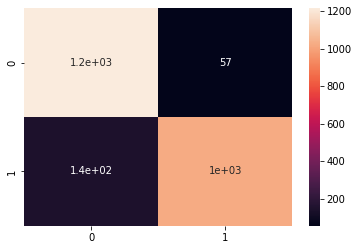

In [25]:
sns.heatmap(cm,annot=True)
plt.show()

In [26]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 0.9171452009844134


# Training the K-NN model on the Training set

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = classifier.predict(X_test)

# KNN confusion matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1272    0]
 [   0 1166]]


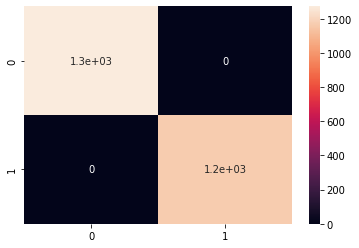

In [30]:
sns.heatmap(cm,annot=True)
plt.show()

In [31]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 1.0


# Training the Naive Bayes on the Training set

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1196   76]
 [ 186  980]]


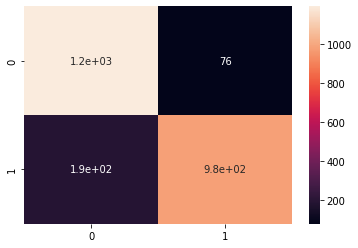

In [34]:
sns.heatmap(cm,annot=True)
plt.show()

In [35]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.8925348646431501


# Training Decision Tree Classification on Train set

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_pred = classifier.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 1.0


# Training the Random Forest Classification model on the Training set

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [39]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc6 = accuracy_score(y_test, y_pred)

[[1272    0]
 [   0 1166]]


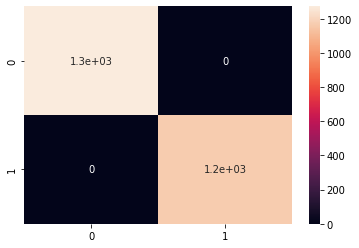

In [40]:
sns.heatmap(cm,annot=True)
plt.show()

In [41]:
print(f"Random Forest Classification accuracy: {acc6}")

Random Forest Classification accuracy: 1.0


# XGBoost

In [42]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:12:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# XG Boost Classifier confusion matrix

In [43]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[1272    0]
 [   0 1166]]


In [44]:
print(f"By XG Boost classifier Acc: {acc7}")

By XG Boost classifier Acc: 1.0


# Trainng CatBoost on the Training set

In [45]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.021639
0:	learn: 0.6415169	total: 51.7ms	remaining: 51.6s
1:	learn: 0.5974867	total: 53.7ms	remaining: 26.8s
2:	learn: 0.5390149	total: 55.8ms	remaining: 18.6s
3:	learn: 0.4883589	total: 57.9ms	remaining: 14.4s
4:	learn: 0.4409428	total: 59.5ms	remaining: 11.8s
5:	learn: 0.4039889	total: 61.1ms	remaining: 10.1s
6:	learn: 0.3690834	total: 62.7ms	remaining: 8.89s
7:	learn: 0.3354487	total: 64.3ms	remaining: 7.97s
8:	learn: 0.3134390	total: 66.1ms	remaining: 7.28s
9:	learn: 0.2843116	total: 68.3ms	remaining: 6.76s
10:	learn: 0.2594835	total: 70.6ms	remaining: 6.34s
11:	learn: 0.2368290	total: 72.7ms	remaining: 5.99s
12:	learn: 0.2165902	total: 74.4ms	remaining: 5.65s
13:	learn: 0.2018215	total: 76ms	remaining: 5.35s
14:	learn: 0.1846841	total: 77.7ms	remaining: 5.11s
15:	learn: 0.1680506	total: 79.4ms	remaining: 4.88s
16:	learn: 0.1592410	total: 81.2ms	remaining: 4.69s
17:	learn: 0.1456513	total: 83.4ms	remaining: 4.55s
18:	learn: 0.1344113	total: 84.9ms	remaining: 

In [46]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc8 = accuracy_score(y_test, y_pred)

[[1272    0]
 [   0 1166]]


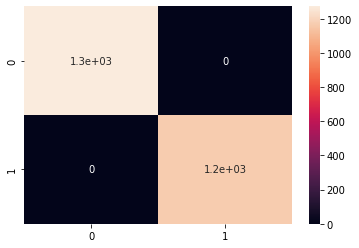

In [47]:
sns.heatmap(cm,annot=True)
plt.show()

In [48]:
print(acc8)

1.0


# Createvisualization of all models.

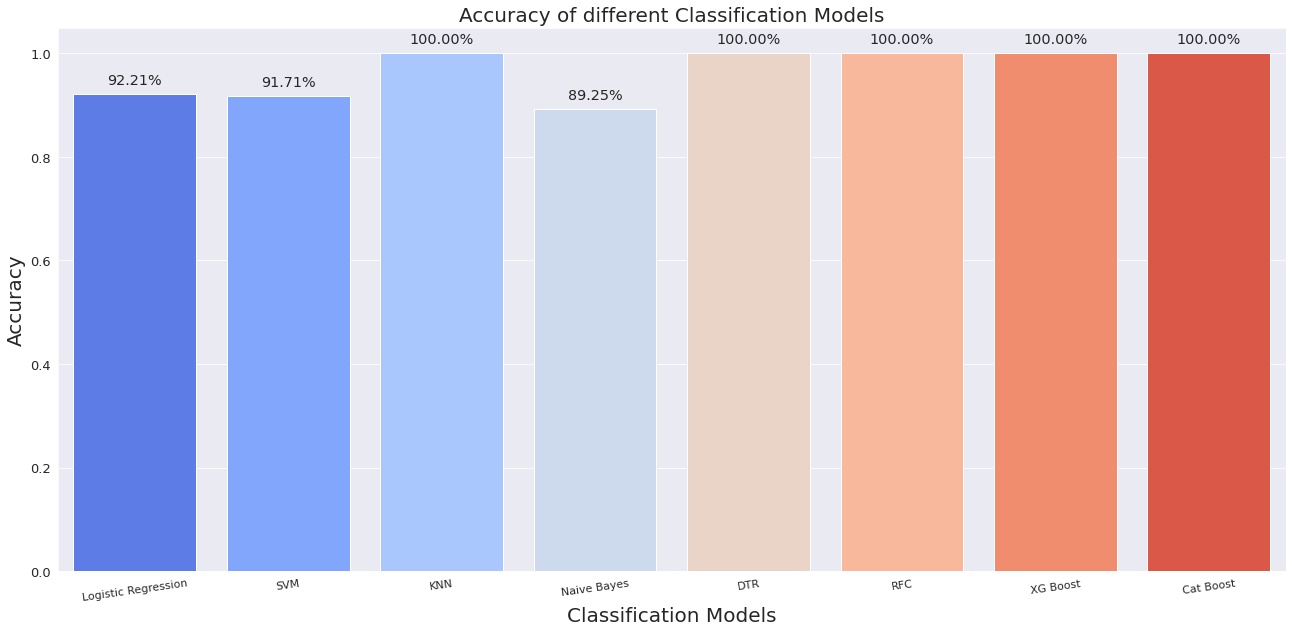

In [49]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RFC")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")
plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Applying k-Fold Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.020686
0:	learn: 0.6441452	total: 1.58ms	remaining: 1.58s
1:	learn: 0.6022222	total: 3ms	remaining: 1.5s
2:	learn: 0.5676700	total: 4.2ms	remaining: 1.4s
3:	learn: 0.5167126	total: 5.88ms	remaining: 1.46s
4:	learn: 0.4686537	total: 7.26ms	remaining: 1.44s
5:	learn: 0.4368845	total: 8.6ms	remaining: 1.43s
6:	learn: 0.4057059	total: 10.5ms	remaining: 1.48s
7:	learn: 0.3693320	total: 12.4ms	remaining: 1.54s
8:	learn: 0.3462245	total: 14.4ms	remaining: 1.58s
9:	learn: 0.3224387	total: 16.4ms	remaining: 1.62s
10:	learn: 0.2971054	total: 18.4ms	remaining: 1.65s
11:	learn: 0.2723358	total: 20.3ms	remaining: 1.67s
12:	learn: 0.2545607	total: 22.4ms	remaining: 1.7s
13:	learn: 0.2384498	total: 24.4ms	remaining: 1.72s
14:	learn: 0.2197172	total: 26.4ms	remaining: 1.73s
15:	learn: 0.2018497	total: 28.5ms	remaining: 1.75s
16:	learn: 0.1890034	total: 30.5ms	remaining: 1.76s
17:	learn: 0.1747441	total: 32.5ms	remaining: 1.77s
18:	learn: 0.1633287	total: 34.7ms	remaining: 1.79s


**As we can see After applying cross validation, also get accuracy 100%.**

![](https://www.gifcen.com/wp-content/uploads/2021/05/the-end-gif-13.gif)